In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
!find /content/drive -name kaggle.json

/content/drive/MyDrive/kaggle.json


In [97]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [98]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
100% 262k/262k [00:00<00:00, 528kB/s]
100% 262k/262k [00:00<00:00, 527kB/s]


In [99]:
!unzip -q credit-card-customer-churn-prediction.zip

In [100]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [102]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [103]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [104]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [105]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [107]:
X_train_trf.shape, X_test_trf.shape

((8000, 11), (2000, 11))

In [108]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7104 - loss: 2170.2534 - val_accuracy: 0.7725 - val_loss: 93.4397
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 82.3233 - val_accuracy: 0.4837 - val_loss: 93.7802
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 65.0008 - val_accuracy: 0.7925 - val_loss: 44.6407
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 46.1580 - val_accuracy: 0.7844 - val_loss: 57.3861
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 65.1303 - val_accuracy: 0.7806 - val_loss: 67.6186
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 84.1206 - val_accuracy: 0.4187 - val_loss: 100.1147
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 63.7597 - val_accuracy: 0.7950 - val_loss: 104.3224
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 88.8839 - val_accuracy:

In [112]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [113]:
accuracy_score(y_test,y_pred)

0.8035

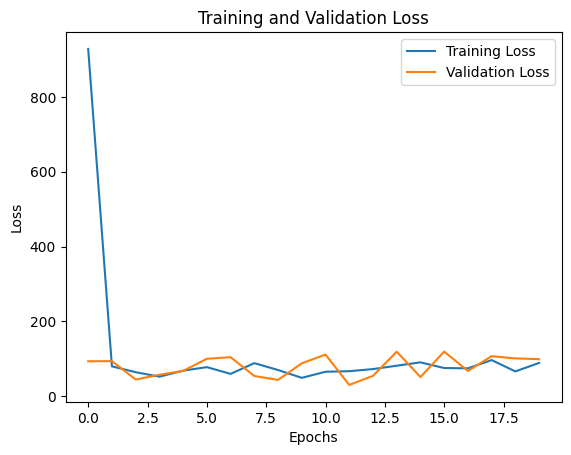

In [114]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

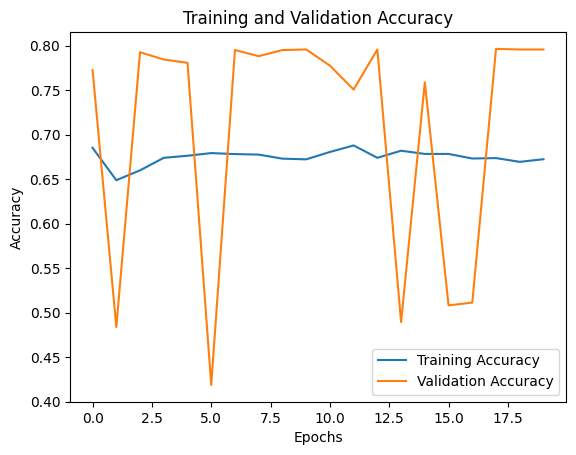

In [115]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [91]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.1, callbacks=[early_stopping])
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy_score(y_test,y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.8035

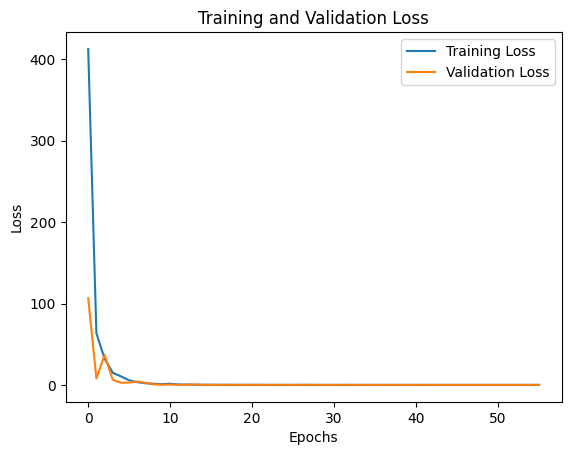

In [92]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

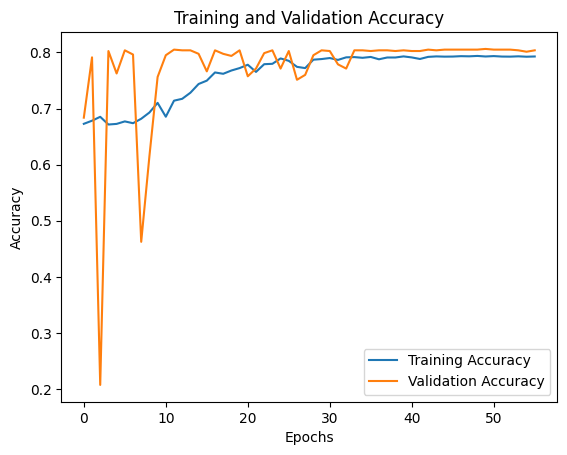

In [93]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()